In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:

# Read in the CSV file as a pandas DataFrame.
df = pd.read_csv('Resources/model_car_prices_no_mmr.csv')

# Review the DataFrame
df.head()


,year,make,body,color,interior,sellingprice,odometer,automatic
0,2015,18,SUV,17,1,21500.0,16639.0,True
1,2015,18,SUV,17,0,21500.0,9393.0,True
2,2014,2,Sedan,8,1,30000.0,1331.0,True
3,2015,40,Sedan,17,1,27750.0,14282.0,True
4,2014,2,Sedan,8,1,67000.0,2641.0,True


Results for body type: SUV
Mean Squared Error (MSE) for SUV: 30171491.491845623
R-squared for SUV: 0.7296187322428098



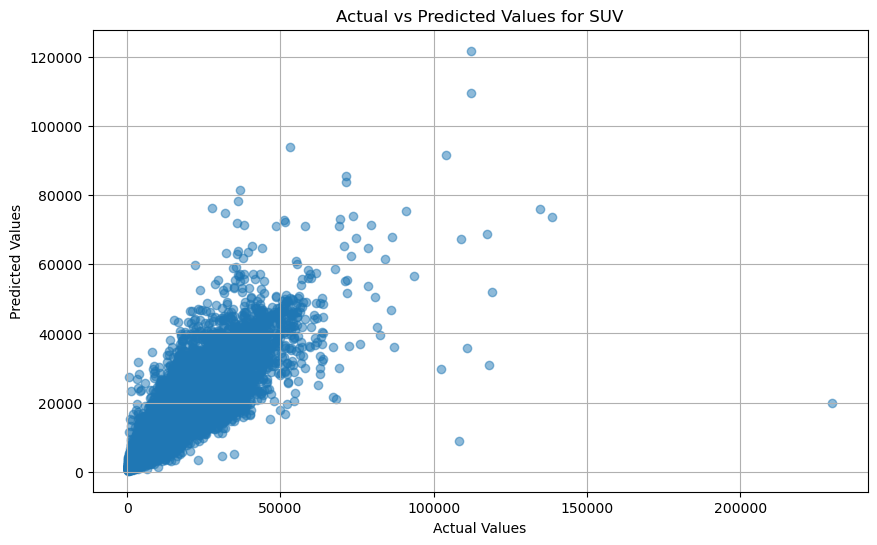

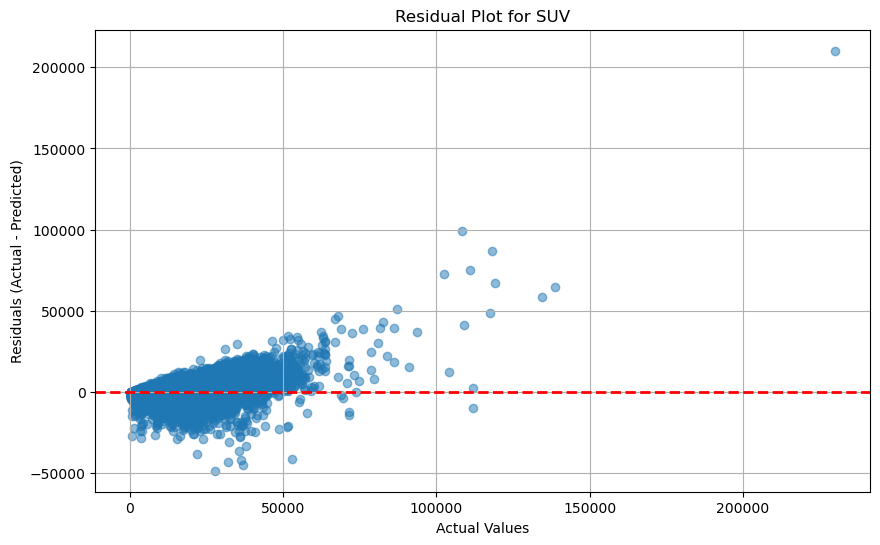

Results for body type: Sedan
Mean Squared Error (MSE) for Sedan: 13128699.078272583
R-squared for Sedan: 0.7757312249101904



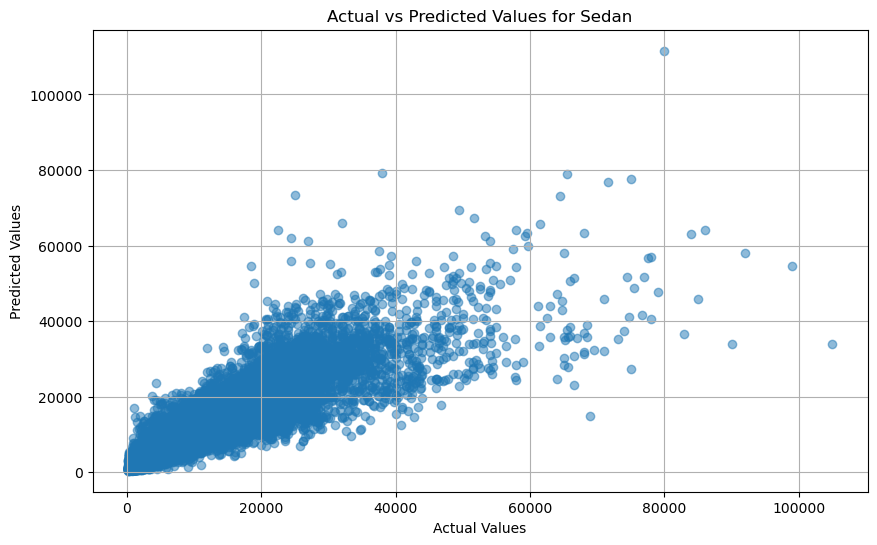

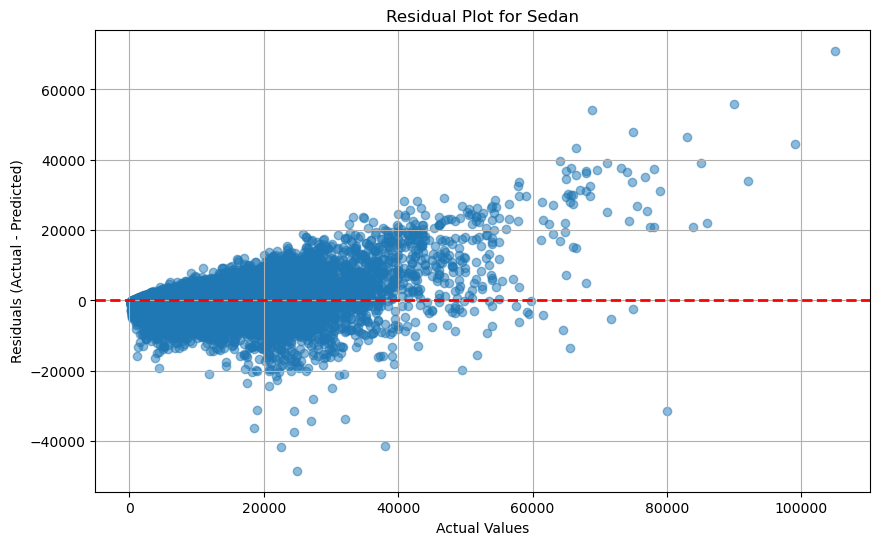

Results for body type: Convertible
Mean Squared Error (MSE) for Convertible: 33964613.780782
R-squared for Convertible: 0.829880514799062



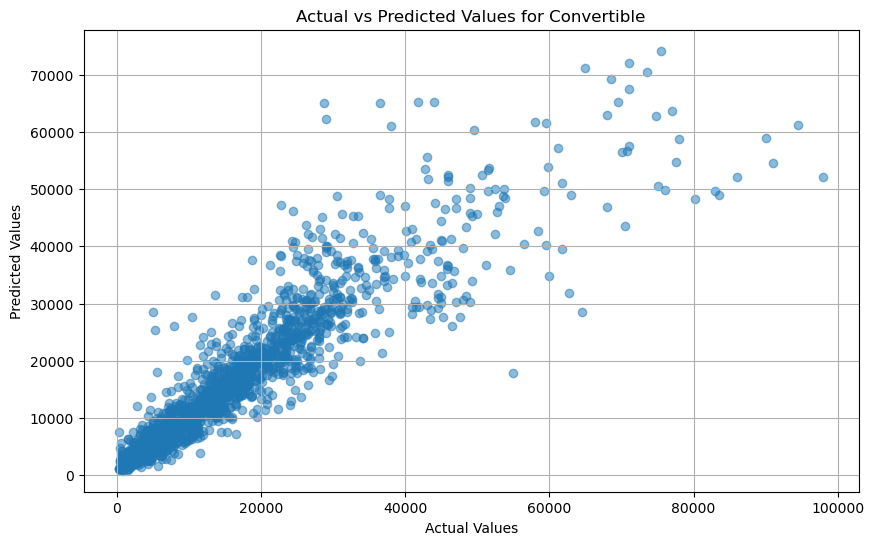

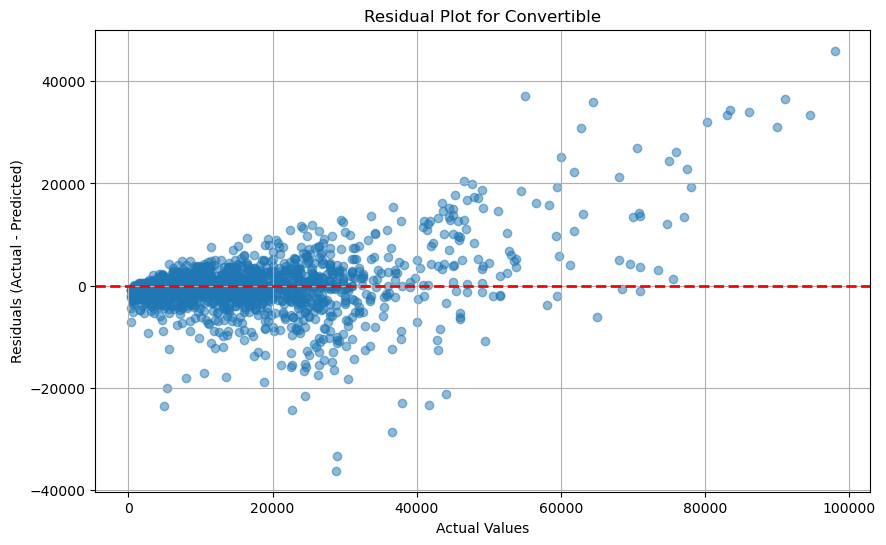

Results for body type: Coupe
Mean Squared Error (MSE) for Coupe: 44814381.02653974
R-squared for Coupe: 0.7551008630238139



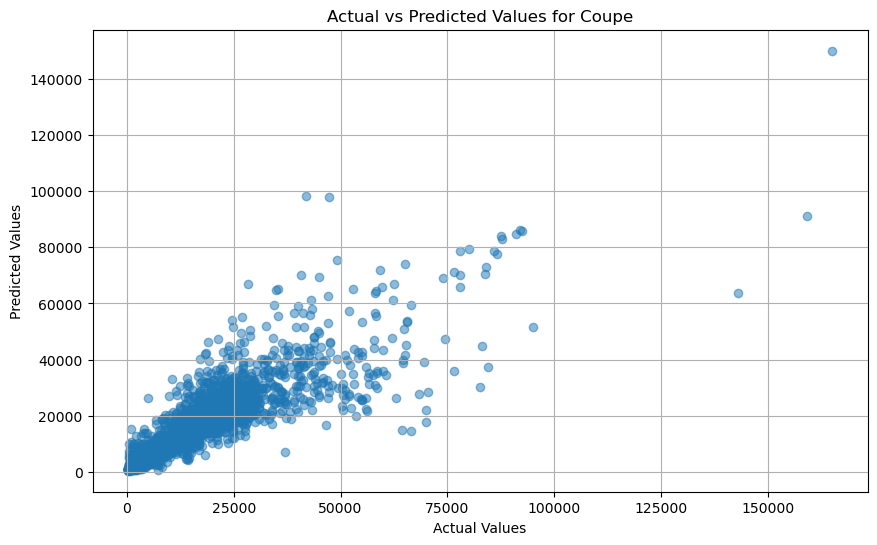

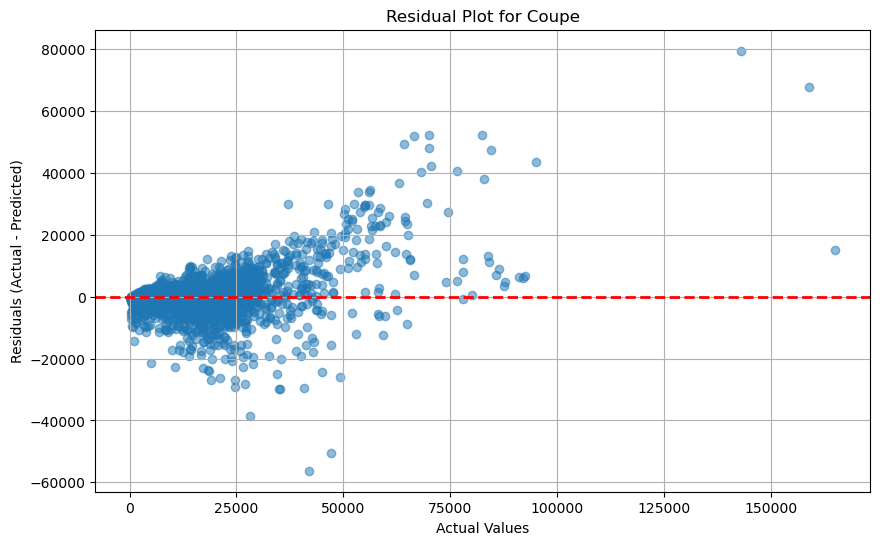

Results for body type: Wagon
Mean Squared Error (MSE) for Wagon: 5515284.175321737
R-squared for Wagon: 0.9004660020661694



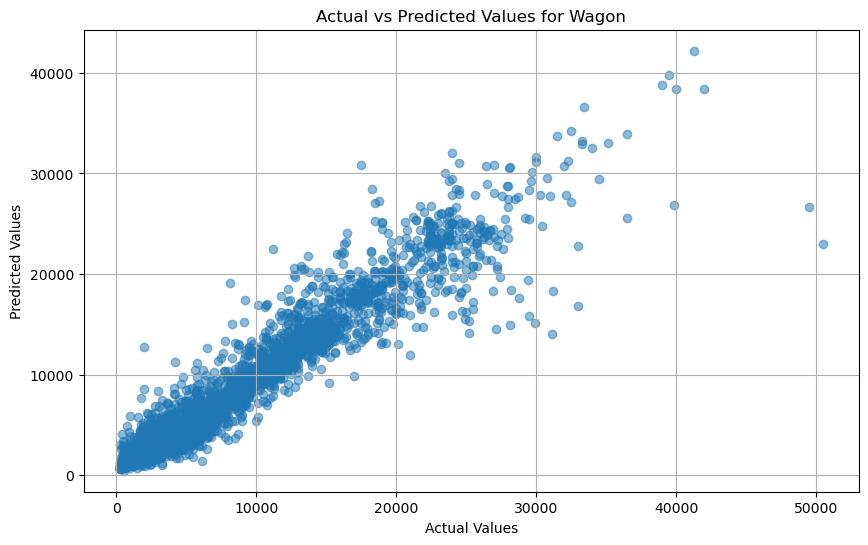

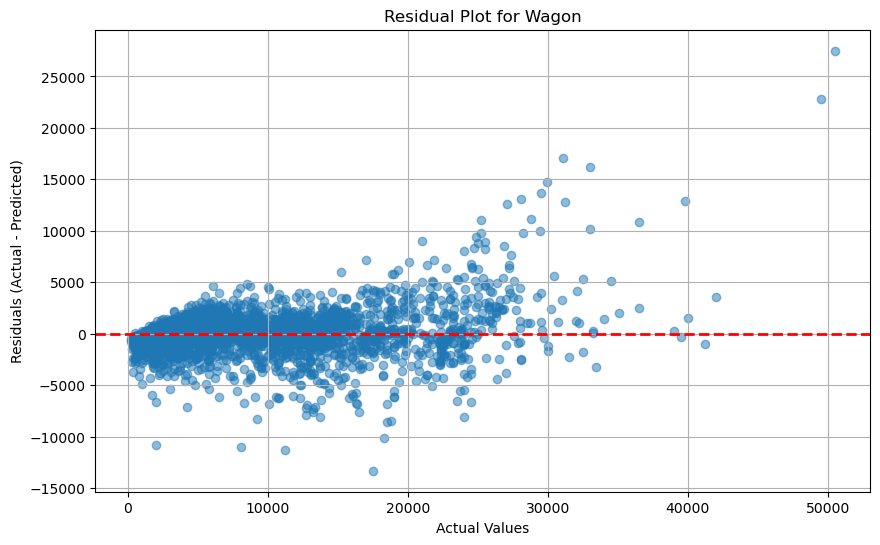

Results for body type: Hatchback
Mean Squared Error (MSE) for Hatchback: 7261070.286251895
R-squared for Hatchback: 0.7492245928591454



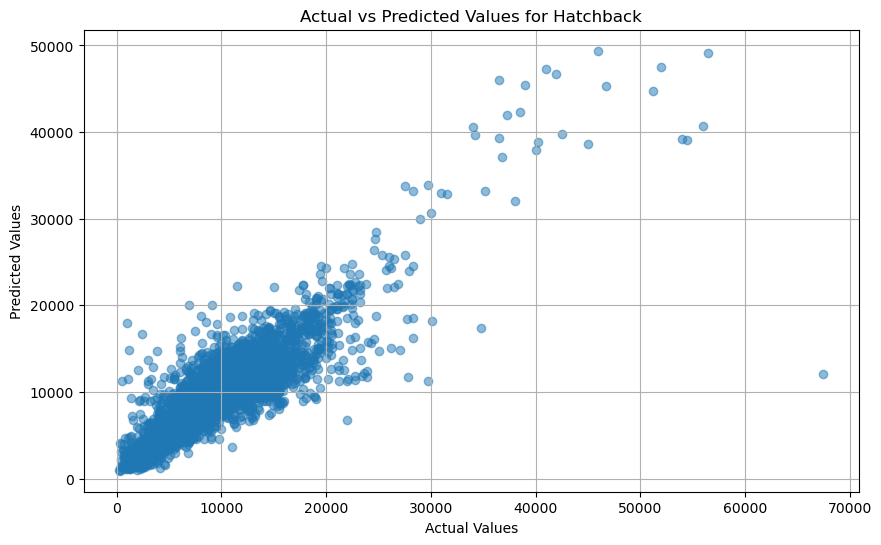

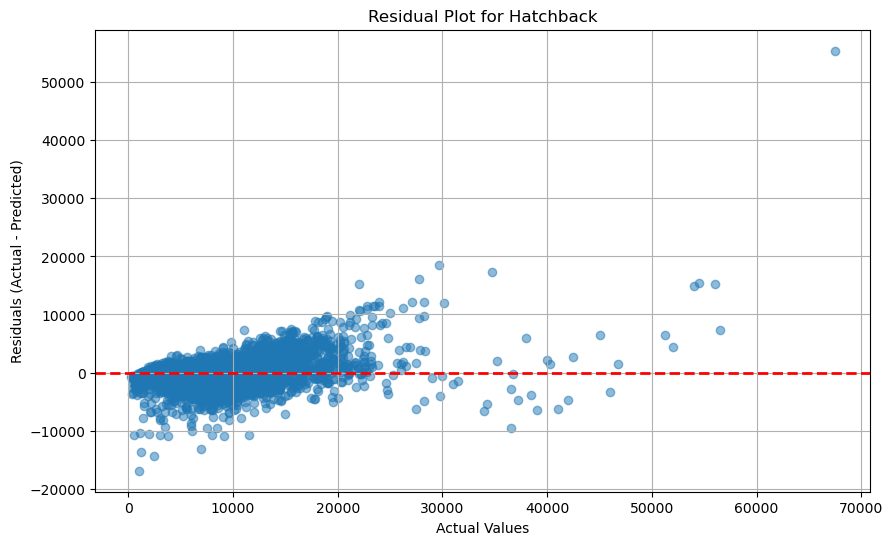

Results for body type: Crew_Truck
Mean Squared Error (MSE) for Crew_Truck: 27749827.72891401
R-squared for Crew_Truck: 0.7251494558543361



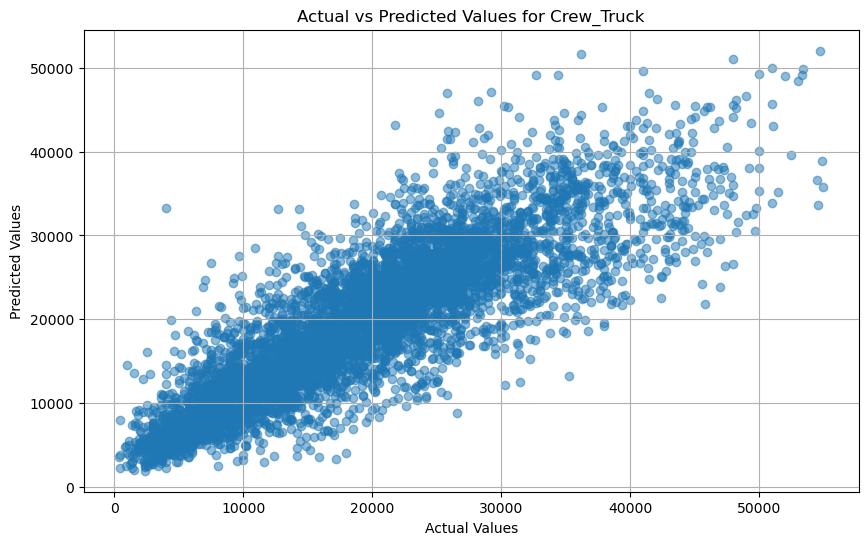

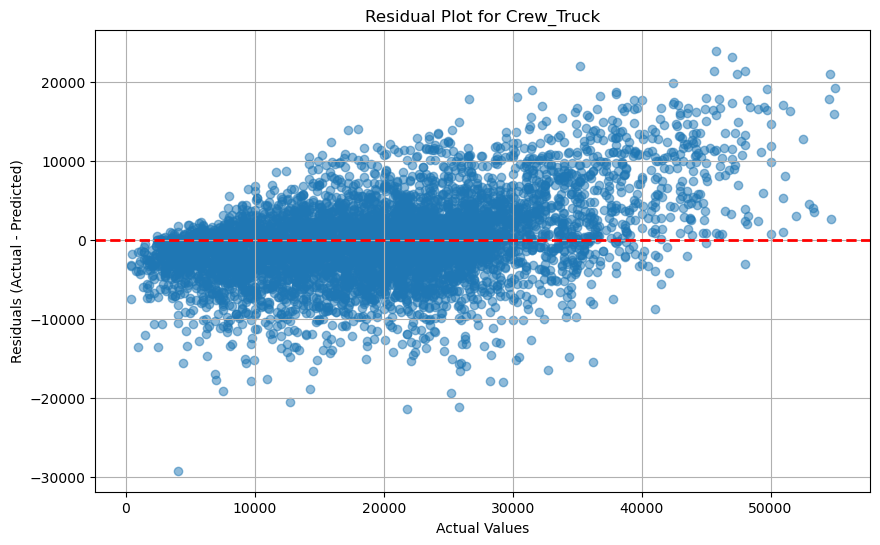

Results for body type: Minivan
Mean Squared Error (MSE) for Minivan: 4355316.656488592
R-squared for Minivan: 0.905213092921635



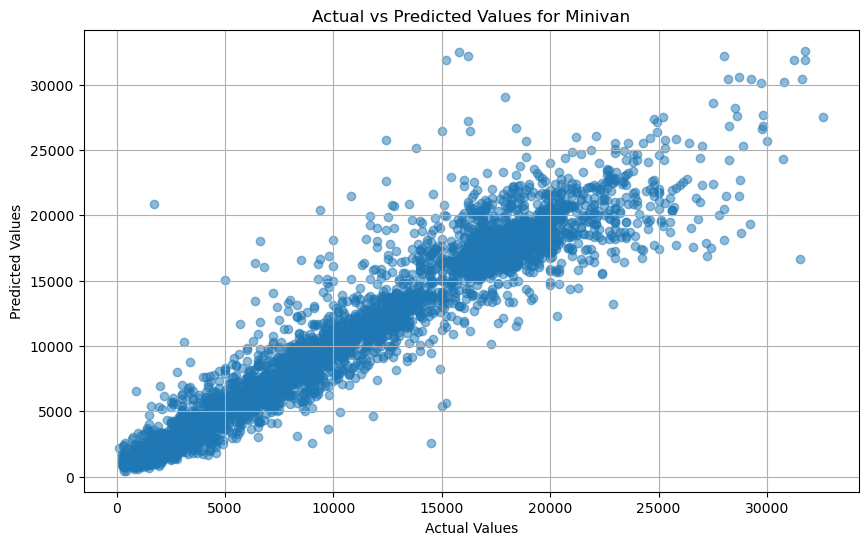

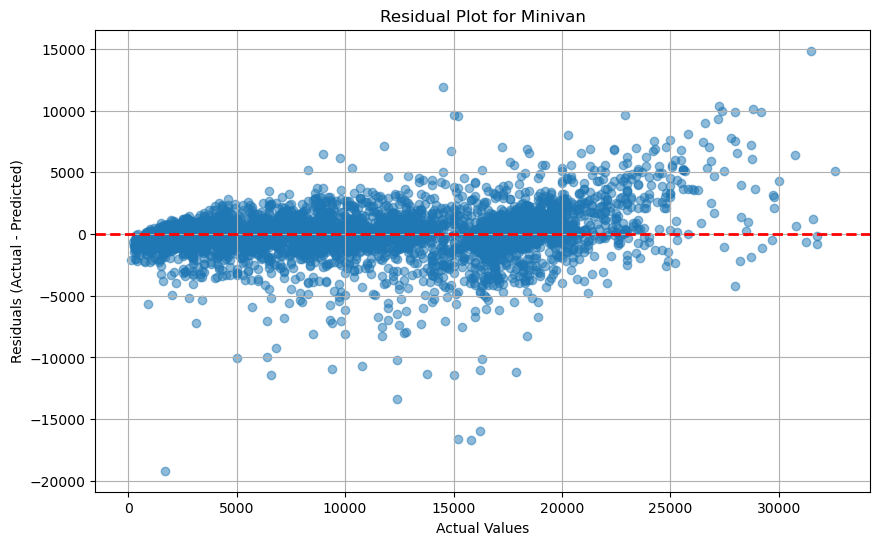

Results for body type: Van
Mean Squared Error (MSE) for Van: 5103588.641798687
R-squared for Van: 0.9018850093835049



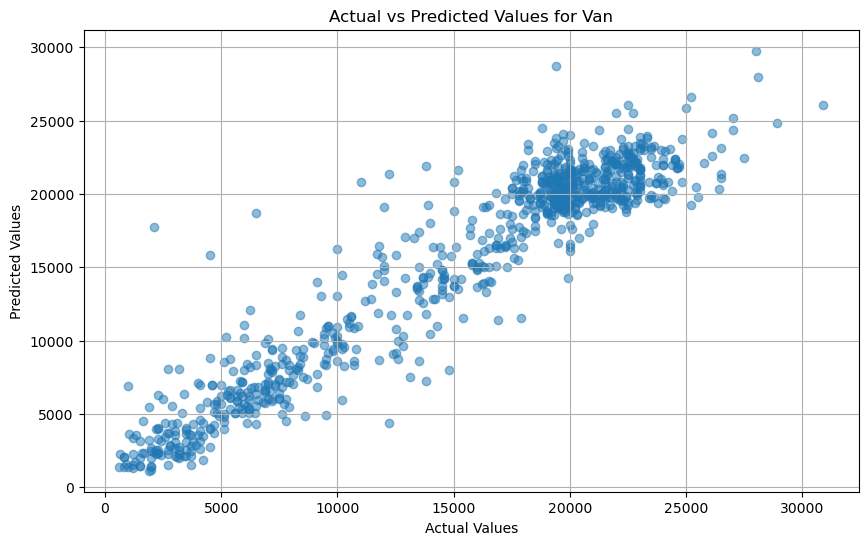

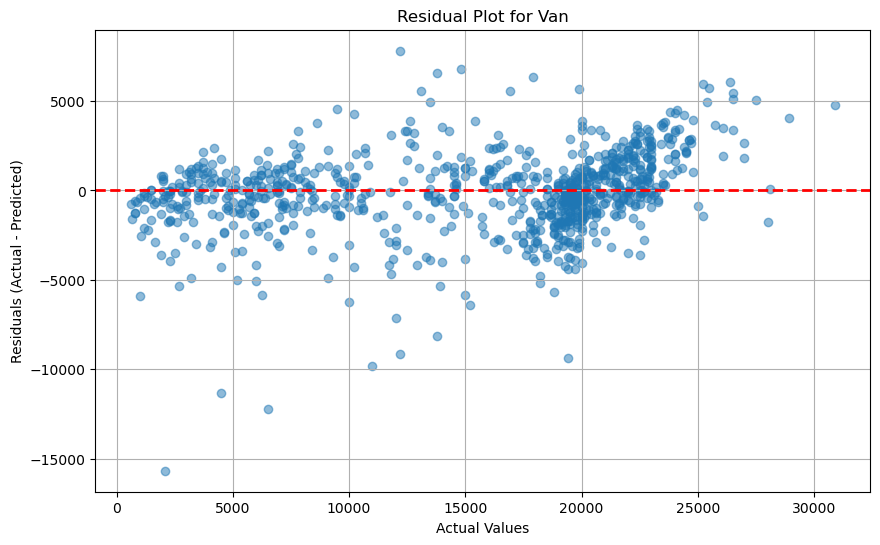

Results for body type: Ext_Truck
Mean Squared Error (MSE) for Ext_Truck: 10897783.038772535
R-squared for Ext_Truck: 0.8001502207092019



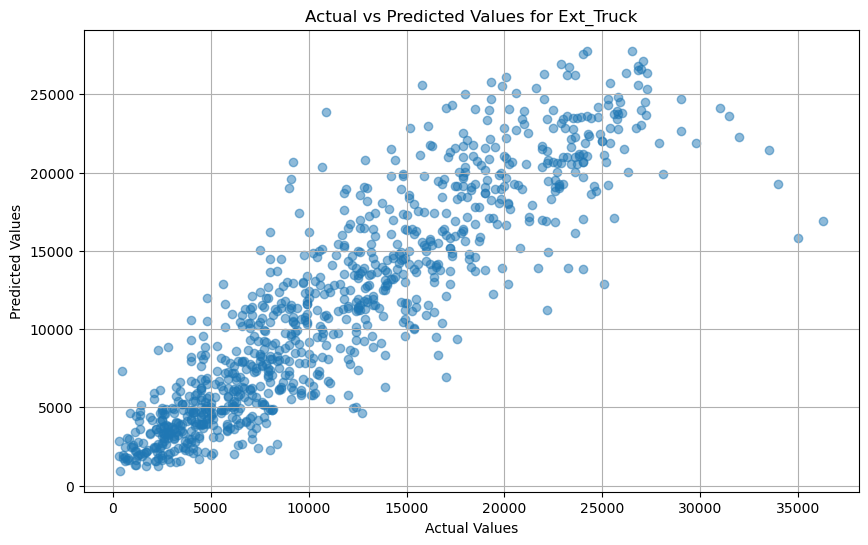

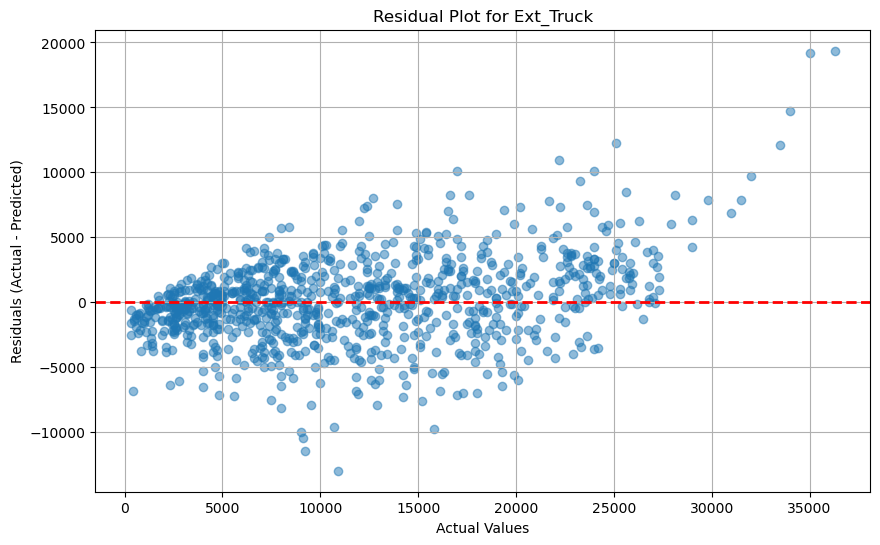

Results for body type: Truck
Mean Squared Error (MSE) for Truck: 6157521.683741982
R-squared for Truck: 0.8520058859497752



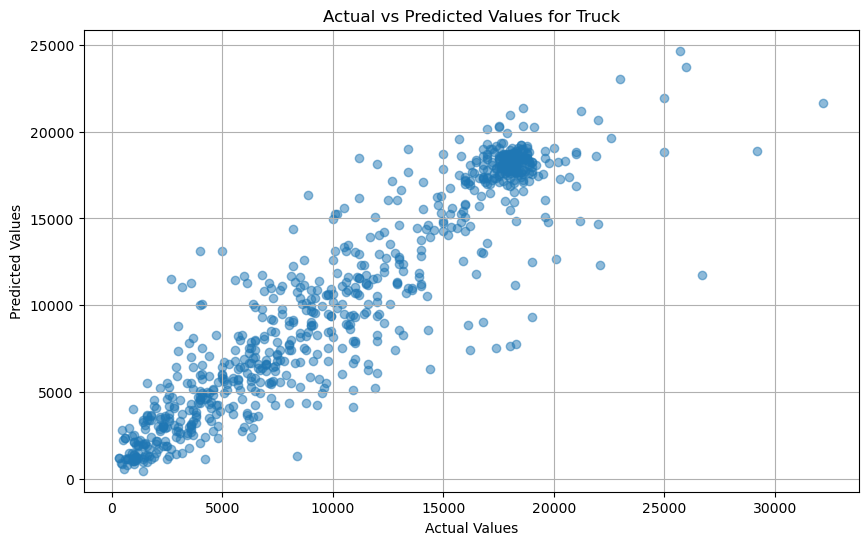

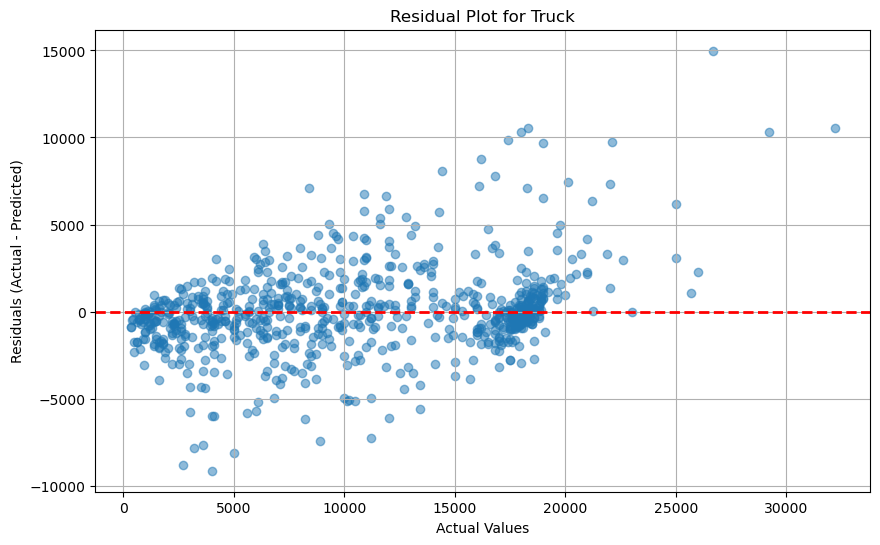

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Define the function to remove outliers for the given column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Features to include (excluding 'body' as it's not used for modeling)
features = ['year', 'odometer', 'make', 'interior', 'color', 'automatic']  # Already encoded

# List of unique body types
unique_bodies = ['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback', 'Crew_Truck', 'Minivan', 'Van', 'Ext_Truck', 'Truck']

# Process each body type separately
for body_type in unique_bodies:
    print(f"Results for body type: {body_type}")
    
    # Filter the DataFrame for the current body type
    df_body = df[df['body'] == body_type]
    
    # Remove outliers from the 'odometer' column
    df_body = remove_outliers(df_body, 'odometer')

    # Set up X and y (excluding 'body' from the model)
    X = df_body[features]
    y = df_body['sellingprice']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Initialize the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=500, random_state=1)
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions using the testing set
    y_pred = rf_model.predict(X_test)
    
    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the performance metrics
    print(f'Mean Squared Error (MSE) for {body_type}: {mse}')
    print(f'R-squared for {body_type}: {r2}\n')
    
    # Scatter plot for actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'Actual vs Predicted Values for {body_type}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals, alpha=0.5)
    plt.title(f'Residual Plot for {body_type}')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.grid(True)
    plt.show()

